# <a name="04-title"><font size="6">Module 04: Introduction to Functions</font></a>

---

# <a name="function">Functions</a>

---


A function is an object that performs a certain action or set of actions based on object(s) it receives from its inputs. Functions usually take in some sort of data structure (value(s), vector(s), dataframe(s), etc.) and return a result.

- The inputs are called <font color="dodgerblue">**arguments**</font> such as:
  - The object (data structure) on which the function carries out a task.
  - Specifications that alter the way the function operates (e.g. options) and stores a set of output(s).
- The <font color="dodgerblue">**defaults**</font> represent standard values and/or options that the author of the function specified as being appropriate for typical cases.
- Help documentation often specifies available options and their corresponding defautls.


## <a name="func-dictionary">A Dictionary of Useful Functions</a>

---

Below is a brief list of commonly used functions some of which we have already been working with.

- `c(x, y)`: combine vectors `x` and `y` into a single vector
- `length(x)`: return the number of elements in `x`
- `sum(x)`: sum the elements in `x`
- `mean(x)`: compute the mean of the elements in `x`
- `median(x)`: compute the median of the elements in `x`
- `min(x)`: compute the minimum value in `x`
- `max(x)`: compute the maximum value in `x`
- `quantile(x, probs = q)`: compute the $q^\text{th}$ quantile of `x`
- `fivenum(x)`: compute five number summary of `x`
- `var(x)`: compute the sample variance of elements in `x`
- `sd(x)`: compute the sample standard deviation of the elements in `x`
- `range(x)`: determine the range (minimum and maximum) of the elements in `x`
- `sqrt(x)`: compute the square root of each element in `x`
- `log(x)`: compute the (natural) logarithm of the elements in `x`
- `summary(x)`: provide a summary (that depends on the data type) of `x`
- `str(x)`: provide information about the structure of `x`. Usually, the class of the object and some information about its size.

In [ ]:
(z <- 1:10)

In [ ]:
exp(z)

In [ ]:
log(z)  # log(z) is the natural log, ln(z), not log base 10

In [ ]:
log(exp(z))

In [ ]:
log10(10^z)  # use log10() for log base 10

In [ ]:
y <- round(log(z), 1)
y

In [ ]:
median(y)

In [ ]:
mean(y)

In [ ]:
sd(y)

In [ ]:
str(airquality)

In [ ]:
# length of a data frame gives the number of columns
length(airquality)

In [ ]:
# length of a vector gives the elements
length(airquality$Ozone)

In [ ]:
mean(airquality)

In [ ]:
mean(airquality$Ozone)

In [ ]:
mean(airquality$Day)

## <a name="funct-struc">Checking Structure of Functions</a>

---

A function has type `closure`. Essentially this means function can access variables from the environment in which it was created. The function *closes over* its surrounding environment, allowing it to recall and use those variables when called later on. You can use the `is.function` function to determine whether an object is a function.



In [ ]:
typeof(mean)

In [ ]:
mode(mean)

In [ ]:
is.function(mean)

# <a name="stat-funct">Functions Related to Statistical Distributions</a>

---

For a review of common statistical distributions in R, refer to the following Colab notebooks:

- [Common discrete statistical distributions](https://colab.research.google.com/drive/1fGMPRSBRt5unIRhEomW4POyMAFzgN6OI?usp=sharing). In particular, distributions discussed are:
  - Binominial distribution
  - Geometric distribution
  - Discrete uniform distribution
  - Poisson distribution

- [Common continuous statistical distributions](https://colab.research.google.com/drive/1vN_b_SzyJ6eu3NEf3oqQTOe3p7jEjjdo?usp=sharing). In particular, distributions discussed are:
  - Normal distribution
  - Continuous uniform distribution
  - Exponential distribution
  - Gamma distribution

Suppose that a random variable $X$ has the `dist` distribution:

-	`p[dist](x, ...)`: returns the value of the cummulative distribution function (cdf) $F(x)$ evaluated at `x`. It gives the value of $F(x) = P(X \leq x)$.

-	`q[dist](q, ...)`: returns the inverse cdf (or quantile function) of $X$ evaluated at $q$. It finds the value $x$ such that $P(X \leq x) = q$ which is also $F^{-1}(q)$.

- `d[dist](x, ...)`: returns the probability mass function (pmf)  or probability density function (pdf) for random variable $X$ (pmf if $X$ is disccrete and pdf if $X$ is continuous).

  - If $X$ is discrete, `d[dist](x, ...)` $= p(x) = P(X = x)$.

  - If $X$ is continuous, `d[dist](x, ...)` $= f(x)$ is the height of the pdf function.
  
- `r[dist](n, ...)`: returns a random sample (with replacement) of size `n` picked from distribution $X$.

<br>  

*Note: The `...` indicates that additional arguments describing the parameters of the distribution may be required.*





## <a name="quest1">Question 1</a>

---

Let $X$ be the birth weight, in grams, of a randomly selected full-term baby.
An article<sup>1</sup> suggests that $X$ is normally distributed with mean 3500 grams and standard deviation 600 grams.

<br>

<font size="2">1. "Fetal Growth Parameters and Birth Weight: Their Relationship to Neonatal Body Composition'" (Ultrasound in Obstetrics and Gynecology, 2009: 441--446)</font>



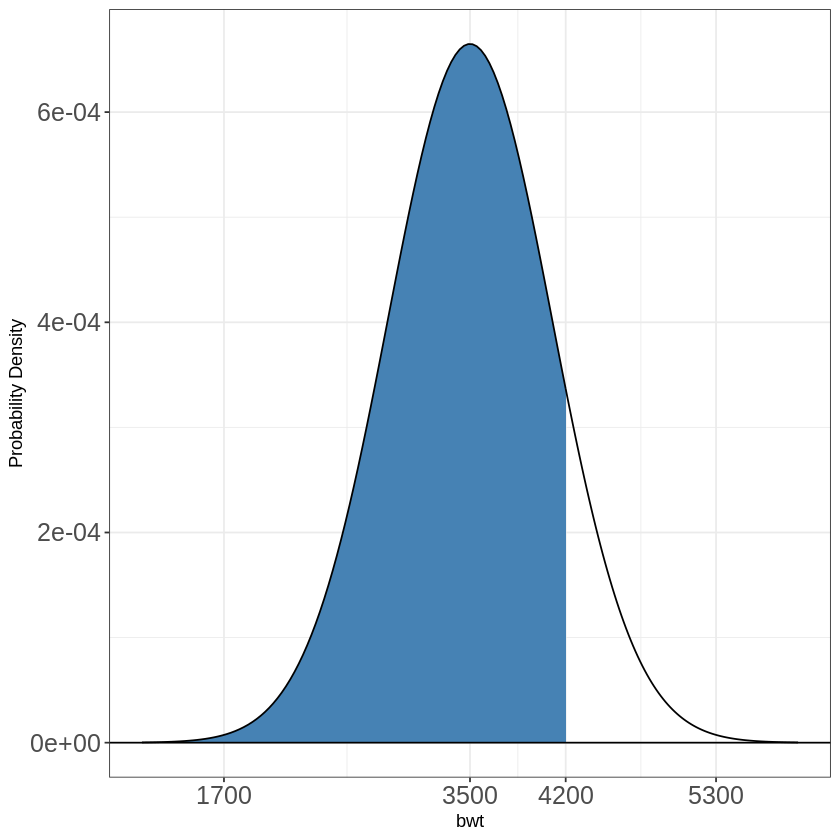

In [1]:
library(ggplot2)

mux <- 3500
sdx <- 600
xmax <- mux + 4*sdx
xmin <- mux - 4*sdx


ggplot(NULL, aes(c(xmin, xmax))) +
  geom_area(stat = "function",   fun = dnorm, args = list(mean = mux, sd = sdx),
            color = "black", fill = "steelblue",
            xlim = c(xmin, 4200)) +
  geom_area(stat = "function",   fun = dnorm, args = list(mean = mux, sd = sdx),
            color = "black", fill = NA,
            xlim = c(4200, xmax)) +
  labs(x = "bwt", y = "Probability Density") +
  scale_x_continuous(breaks=c(mux-3*sdx, mux, 4200, mux+3*sdx)) +
  geom_hline(yintercept=0) +
  theme_bw() +
  theme(axis.text.x=element_text(size=15), axis.text.y=element_text(size=15))

### <a name="quest1a">Question 1a</a>

---

What is the probability that the weight of such a randomly selected newborn is less than or equal to 4200 g?


<br>  

#### <a name="sol1a">Solution to Question 1a</a>

---

Use code cell below to help answer. Then type your answer in the this text cell. Enter your answer as a proportion rounded to four decimal places.

<br>  

$P(X \leq  4200 ) = $ ??

<br>  
<br>  


### <a name="quest1b">Question 1b</a>

---

What is 90th percentile for birth weight (in grams) of a full-term baby?

<br>  

#### <a name="sol1b">Solution to Question 1b</a>

---

Use code cell below to help answer. Then type your answer in the this text cell. Enter your answer in grams, rounded to one decmial place.

<br>  

The 90th percentile is ?? grams.

<br>  
<br>  


### <a name="quest1c">Question 1c</a>

---

Pick a random sample of 20 birth weights from a population with $X \sim N(3500, 600)$. Store the result to a vector named `bwt`.

<br>  

#### <a name="sol1c">Solution to Question 1c</a>

---

Use the code cell below. There is no text to enter in this cell.

<br>  

In [ ]:
set.seed(5523)  # sets randomization seed for consistent output


# <a name="define-funct">Defining Our Own Functions</a>

---

A function is essentially a sequence of commands executed based on certain arguments supplied to the function.

In R, a function is defined using the general format:

```
myfunction <- function(arg1, arg2, arg3) {
	code to execute
}
```

In the example above,

-  The name of the function is `myfunction`.
-  There are three required inputs (or arguments) named `arg1`, `arg2`, and `arg3`.
-  To use this function with `x1`, `x2`, and `x3` as inputs for `arg1`, `arg2`, and `arg3`, respectively, we enter `myfunction(x1, x2, x3)`.

Let's create a function named `my_mean()` that returns the mean of the values stored in a vector `x`. Recall the mean is $\bar{x}$ and is computed using the formula below where $n$ denotes the number of values in $x$:

$$\bar{x} = \dfrac{x_1 + x_2 + \ldots + x_n}{n} = \dfrac{ \sum_{i=1}^n x_i}{n}.$$







In [ ]:
my_mean <- function(x) {
  n <- length(x)  # compute number of elements in x
	xbar <- sum(x) / n  # sum of x divided by n
  xbar  # print xbar to screen
}

## <a name="quest2">Question 2</a>

---

In the first code cell below, use the function `my_mean()` to compute the mean of the random sample of $n=20$ birth birth weights stored to the vector `bwt` in [Question 1c](#quest1c).

<br>

In the second code cell, use the `mean()` function to compute the mean of the values stored in `bwt` and check to make sure the two functions return the same result.

<br>  


### <a name="sol3">Solution to Question 2</a>

---

<br>  


In [ ]:
my_mean(??)  # compute mean using my_mean

In [ ]:
mean(??)  # compute mean using mean

## <a name="quest3">Question 3</a>

---


Create a function named `my_density()` that returns the probability density of a normal random variable with mean `mu` and standard deviation `sigma` for a each value in vector `x`. Recall that the density function of a normal random variable is

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}.
$$


The function should have three arguments:

- `x`: A vector of values to determine the density.
- `mu`: The mean of the normal distribution.
- `sigma`: The standard deviation of the normal distribution.

<br>  

*Hint: The number $\pi$ is obtained in R by entering `pi`.*

<br>  



### <a name="sol3">Solution to Question 3</a>

---

<br>  

In [ ]:
my_density <- ??

## <a name="quest4">Question 4</a>

---

In the first code cell below, use the function `my_density()` to compute the values of the corresponding pdf of the birth weight random variable $X \sim N(3500, 600)$ from [Question 1](#quest1) at each value stored in the `bwt` vector created in [Question 1c](#quest1c).

<br>

In the second code cell, use the `dnorm()` function to compute the values of the corresponding pdf of the birth weight random variable $X \sim N(3500, 600)$ at each value stored in the `bwt` and check to make sure the two functions return the same results.

<br>  


### <a name="sol4">Solution to Question 4</a>

---

<br>  


In [ ]:
my_density(??)  # compute mean using my_density

In [ ]:
dnorm(??)  # compute mean using dnorm

## <a name="funct-list">Functions Returning a List of Results</a>

---

Let's do an example of a function that returns two pieces of information using a `list`. We haven't really talked about lists yet, but we will learn more about them later.

In the code cell below, we create a function named `my_summary()` that returns the mean and standard deviation of a vector `x`.

- The sole argument will be, `x`, a vector of numeric values.
- There are two outputs printed to the screen:
	- The mean of `x` is stored to `m` and
	- The standard deviation of `x` is stored to `s`
- Running `my_summary(x)` will display all outputs in the list on the screen.
- Running `my_summary(x)$mmean` will display only the mean `m`.
- Running `my_summary(x)$stdev` will display only the standard deviation `s`.


In [ ]:
my_summary <- function(x) {
	m <- mean(x)  # compute the sample mean of x
	s <- sd(x)  # compute the sample sd of x
	return(list(mmean = m, stdev = s))  # return a list with elements mmean and stdev
}

In [ ]:
my_summary(bwt)  # displays all outputs

In [ ]:
my_summary(bwt)$mmean  # displays only output stored in mmean

In [ ]:
my_summary(bwt)[[1]]  # displays 1st output in list

In [ ]:
my_summary(bwt)$stdev  # displays only output stored in stdev

In [ ]:
my_summary(bwt)[[2]]  # displays 2nd output in list

## <a name="CC License">Creative Commons License Information</a>
---

![Creative Commons
License](https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png)

Materials created by the [Department of Mathematical and Statistical Sciences at the University of Colorado Denver](https://github.com/CU-Denver-MathStats-OER/)
and is licensed under a [Creative Commons
Attribution-NonCommercial-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-nc-sa/4.0/).